<h1>University of Toronto School of Continuing Studies</h1>
<h2>SCS3250 - 029 Foundations of Data Science</h2>
<h3>Simplified Data-Driven Approach to Predict the Success of Bank Outbound Campaign</h3>

<ul>
    <li>Bateman, Victoria</li>
    <li>Juliano, Cesar</li>
    <li>Schiavo, Maristela</li>
    <li>Sharma, Kaushik</li>
</ul>


<h2>Table of Contents</h2>

<ul>
    <li><a href='#glancing'>The Project and Data at a Glance</a></li>
    <li><a href='#preamble'>Preamble: Module Imports and Initial Code Setup</a></li>
    <li><a href='#loading'>Loading, Reading, and Describing the Data</a></li>
    <li><a href='#cleaning'>Data Cleaning: Filling Missing Values</a></li>
    <li><a href='#exploring'>Exploring the Data</a></li>
    <li><a href='#selecting'>Selecting and Running the Model</a></li>
    <li><a href='#evaluating'>Model Evaluation</a></li>
</ul>


<a name='glancing'></a>
<h2>The Project and Data at a Glance</h2>

<h3>Description</h3>
<p>Our group has selected to analyze data pertaining to direct marketing campaigns of a Portuguese banking institution. The clients were contacted via telephone, more than once if necessary, in order to determine if the client would accept (respond with 'yes') or reject (respond with 'no') the bank's offer of a term deposit subscription.</p>


<h3>Goal</h3>
<p>Our classification goal is to predict if the client will accept or reject (yes or no) a term deposit from the banking institution (variable y).</p>

<p><b>Source</b>: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014 (<a href='https://archive.ics.uci.edu/ml/datasets/bank+marketing#'>https://archive.ics.uci.edu/ml/datasets/bank+marketing#</a>)</p>


<h3>Data Set Information</h3>
<p>Among four datasets available, our group has selected <code>bank-additional-full.csv</code> with 41,188 observations and 20 columns/features, over the period of May 2008 to November 2010, which is very close to the data analyzed in [Moro et al., 2014]</p>


<h3>Columns/Features Description</h3>

<h5>Client Information</h5>
<ul>
    <li><code>age</code>: [numeric]</li>
    <li><code>job</code>: [categorical] type of job ('admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')</li>
    <li><code>marital</code>: [categorical] marital status ('divorced' <em>which could mean divorced or widowed</em>, 'married', 'single', 'unknown')
    </li>
    <li><code>education</code>: [categorical] educational attainment ('basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
    </li>
    <li><code>default</code>: [categorical] has credit in default ('no', 'yes', 'unknown')</li>
    <li><code>housing</code>: [categorical] has housing loan ('no', 'yes', 'unknown')</li>
    <li><code>loan</code>: [categorical] has personal loan ('no', 'yes', 'unknown')</li>
</ul>


<h5>Details about the previous correspondence of the current campaign</h5>
<ul>
    <li><code>contact</code>: [categorical] communication method ('cellular', 'telephone')</li>
    <li><code>month</code>: [categorical] month of last correspondence ('jan', 'feb', 'mar', ..., 'nov', 'dec')</li>
    <li><code>day_of_week</code>: [categorical] day of last correspondence ('mon', 'tue', 'wed', 'thu', 'fri')</li>
    <li><code>duration</code>: [numeric] duration of last correspondence, in seconds <b>Important note</b>: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.</li>
</ul>


<h5>Other Campaign Attributes</h5>
<ul>
    <li><code>campaign</code>: [numeric] number of correspondences performed during this campaign with this client (includes last correspondence)</li>
    <li><code>pdays</code>: [numeric] number of days passed since the client was last contacted for a previous campaign (999 means client has not been previously contacted</li>
    <li><code>previous</code>: [numeric] number of previous correspondences with this client before the current campaign</li>
    <li><code>poutcome</code>: [categorical] outcome of the previous marketing campaign ('failure', 'nonexistent', 'success')</li>
</ul>


<h5>Social and Economic Context Attributes</h5>
<ul>
    <li><code>emp.var.rate</code>: [numeric] Employment Variation Rate - Quarterly Indicator</li>
    <li><code>cons.price.idx</code>: [numeric] Consumer Price Index - Monthly Indicator</li>
    <li><code>cons.conf.idx</code>: [numeric] Consumer Confidence Index - Monthly Indicator</li>
    <li><code>euribor3m</code>: [numeric] Euribor 3-Month Rate - Daily Indicator</li>
    <li><code>nr.employed</code>: [numeric] Number of Employees - Quarterly Indicator</li>
</ul>


<h5>Output Variable (Desired Target)</h5>
<ul>
    <li><code>y</code>: [binary] has the client accepted or rejected subscription to a term deposit ('yes', 'no')</li>
</ul>


<a name='preamble'></a>
<h2>Preamble: Module Imports and Initial Code Setup</h2>

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline


<h3>Collaboratory Import</h3>

<p>During our group work we decided to use Collaboratory, a cloud-based online tool for collaborative development. The code below was used in order to properly read the data set, which was stored in a Google Drive. It is added below for reference, but is not necessary when running the code as a Jupyter notebook in Anaconda.</p>

In [63]:
'''
!pip install -U -q PyDrive

from google.colab import auth
from oauth2client.client import GoogleCredentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive( gauth )
'''

#file_import = drive.CreateFile( { 'id': '1CdBc4rpNiiLZ4g5CoG7eFYzJP7-WQchy' } )
#file_import.GetContentFile( 'bank-additional-full.csv' )


'\n!pip install -U -q PyDrive\n\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\n\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive( gauth )\n'

<h3>Utility Code</h3>

<p>Below are some utility functions created to encapsulate common tasks and related code.</p>

In [64]:
# Display the unique values for each of the feature
# or column in the dataframe passed to the function
def get_unique_values ( df ) :
    for column in df :
        print( column, ':' )
        print( df[ column ].unique() )
        print( '\n' )



# Compute the percentage of null values
# for each feature within the dataframe
def get_null_percentages ( df ):
    total = df.count().max()
    n = pd.DataFrame( columns = [ 'Variable_Name', 'Null_Actual', 'Null_Percent' ] )
    
    for column in df:
        null = df[ column ].isnull().sum()
        nullpercent = ( null / total ) * 100
        n.loc[ len( n ) ] = [ column, null, nullpercent ]
        
    return n



# Create acceptance chart based on the specified feature or column
def create_acceptance_chart ( frame_data, chart_data ) :
    # internal variables
    BAR_WIDTH = 0.5
    COLOR_ACCEPT = 'c'
    COLOR_REJECT = 'orange'
    LEGEND_ACCEPT = 'Accepted'
    LEGEND_REJECT = 'Not Accepted'
    
    # data frame information
    df = frame_data[ 'dataframe' ]
    col = frame_data[ 'column' ]
    target = frame_data[ 'target' ]
    
    # group those who accepted and rejected the term deposit, by the feature specified
    accepted = df[ df[ target ] == frame_data[ 'accept' ] ].groupby( col ).size()
    not_accepted = df[ df[ target ] == frame_data[ 'reject' ] ].groupby( col ).size()
    
    # set chart index and figure size
    x_idx = list( range( 1, len( chart_data[ 'tick_values' ] ) + 1 ) )
    fig = plt.figure( figsize = chart_data[ 'dimension' ] )
    
    # set bar parameters
    bar_acc = plt.bar( x_idx, accepted, width = BAR_WIDTH, bottom = not_accepted, color = COLOR_ACCEPT )
    bar_not_acc = plt.bar( x_idx, not_accepted, width = BAR_WIDTH, color = COLOR_REJECT ) 
    
    # set other chart details
    plt.title( chart_data[ 'title' ] )
    plt.xticks( x_idx, chart_data[ 'tick_values' ] )
    
    plt.xlabel( chart_data[ 'label_x' ] )
    plt.ylabel( chart_data[ 'label_y' ] )
    
    plt.legend( ( bar_not_acc[ 0 ], bar_acc[ 1 ] ), ( LEGEND_REJECT, LEGEND_ACCEPT ) )
    
    # show plot
    plt.show()



# Computes the acceptance ratio among the various values of a feature;
# it adds a quantitative element to the plotting of acceptance values
# especially when the distinction among values is not quite obvious.
def get_acceptance_ratio ( df, col, target, accept, reject ) :
    total = df[ col ].count()
    
    ratios = pd.crosstab( df[ col ], df[ target ] )
    ratios[ 'acceptance_rate_total' ] = ( ratios[ accept ] / total ) * 100
    ratios[ 'acceptance_rate_group' ] = ( ratios[ accept ] / ( ratios[ accept ] + ratios[ reject ] ) ) * 100
    
    return ratios



# Select all categorical features/columns from the data and create
# a list of series of dummy data from itexcept the actual response
# Finally, combine with the original data and return new dataframe
# Reference source: http://pbpython.com/categorical-encoding.html
def do_categorical_encoding ( df, data_type, exclude_col, ax = 1 ) :
    cat_columns = df.select_dtypes( include = data_type )
    
    frames = [ pd.get_dummies( df[ cat ], prefix = cat + '_' ) for cat in cat_columns if not( cat == exclude_col ) ]
    frames.insert( 0, df )
    
    return pd.concat( frames, ax )



# Select remaining categorical data as well as age_break and
# duration features/columns and remove them from the data set
def drop_columns ( df, data_type, other_cols  ) :
    cat_columns = df.select_dtypes( include = data_type )
    df.drop( cat_columns, axis = 1, inplace = True )
    df.drop( other_cols, axis = 1, inplace = True )


<a name='loading'></a>
<h2>Loading, Reading, and Describing the Data</h2>

In [65]:
sales = pd.read_csv( 'bank-additional-full.csv', sep = ";" )
sales.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
# Identifying the number of null values per column in the dataframe
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [67]:
# Running descriptive statistics on the dataframe
sales.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Few things we can say about the descriptive statistics about this dataset:

<ul>
    <li><b>AGE</b> of clients targeted for campaign: The average age was 40 years old, with a variation of +/- 10 years, the youngest being 17 years old and the oldest 98 years old.</li>
    <li><b>DURATION</b> of call the last time client was contacted (in seconds): The average was 4.3 minutes with a variation of +/- 4.4 minutes, being the longest 1hour and 36 minutes</li>
    <li><b>CAMPAIGN</b> (total number of contacts for a client during this campaign): The average was 2.56 times contacted, with variation of +/- 2.77 times, being the maximum # of contacts 56 times</li>
    <li><b>PDAYS</b> (number of days passed after client was last contacted from previous campaigns - 999:  this is the first contact) The average is 962 days (32 months / 2.67 years), with variation of +/- 187 days (6.23 months)</li>
    <li><b>PREVIOUS</b> (#  contacts for a client prior to this campaign) The maximum number of contacts were 7.</li>
</ul>


In [68]:
# Determining unique values of the columns in the dataframe.
# Using a custom function, here we see why there are no null
# values in the dataframe: the data was set to 'unknown.'
get_unique_values( sales )


age :
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


marital :
['married' 'single' 'divorced' 'unknown']


education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


default :
['no' 'unknown' 'yes']


housing :
['no' 'yes' 'unknown']


loan :
['no' 'yes' 'unknown']


contact :
['telephone' 'cellular']


month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri']


duration :
[ 261  149  226 ... 1246 1556 1868]


campaign :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 3

<a name='cleaning'></a>
<h2>Data Cleaning: Filling Missing Values</h2>

In [69]:
# Replacing 'unknown' values with NaN for easier imputation
sales = sales.replace( 'unknown', np.nan )


In [70]:
# Looking at the null values by feature again to check the true number of nulls
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [71]:
# Looking at the null features in the dataframe via custom function,
# in order to decide whether to impute or drop the feature or rows
get_null_percentages( sales )


,Variable_Name,Null_Actual,Null_Percent
0,age,0,0.000000
1,job,330,0.801204
2,marital,80,0.194231
3,education,1731,4.202680
4,default,8597,20.872584
5,housing,990,2.403613
6,loan,990,2.403613
7,contact,0,0.000000
8,month,0,0.000000
9,day_of_week,0,0.000000


The feature 'default' has a large percentage of nulls: more than 20%

<h3>Imputing the Job feature</h3>

In [72]:
# Adding an age break column to the dataframe in order to group ages
sales[ 'age_break' ] = pd.cut( sales[ 'age' ], [ 0, 20, 40, 59, 200 ] )


In [73]:
# Creating a lookup table using age_break, in order to fill missing
# job values with the most common jobs for the different age group
joblook = sales[ ['job', 'age_break' ] ]
joblook = joblook.groupby( [ 'age_break' ] ).apply( pd.DataFrame.mode )
joblook = pd.DataFrame( joblook[ 'job' ], columns = [ 'job' ], index = joblook.index )

joblook = joblook[ 'job' ]
joblook = joblook.reset_index()

joblook = joblook[ joblook[ 'job' ].notnull() ]
joblook = joblook.set_index( [ 'age_break' ] )
joblook = joblook.drop( [ 'level_1' ], axis = 1 )

joblook


,job
age_break,
"(0, 20]",student
"(20, 40]",admin.
"(40, 59]",blue-collar
"(59, 200]",retired


In [74]:
# Imputing missing job values using the job lookup 
nulls = sales.loc[ sales[ 'job' ].isnull(), 'age_break' ]
sales.loc[ sales[ 'job' ].isnull(), 'job' ] = joblook.loc[ nulls ].values


In [75]:
# Check the job variable to make sure all missing values have been imputed
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
age_break         41188 non-null category
dtypes: c

<h3>Imputing the Default feature</h3>

In [76]:
# 'Default' has a high number of missing values - exploring this feature a bit more
# to see if it can be imputed. Confirming how many customers have defaulted on a loan
sales[ sales[ 'default' ] == 'yes' ]

# There are only three customers who have 'defaulted' so this variable
# should be dropped as there is no meangingful variation in the data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_break
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,"(40, 59]"
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,"(40, 59]"
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,"(20, 40]"


<h3>Imputing the Marital feature</h3>

In [77]:
# Finding the most common value of feature "marital". The answer is that most clients are married.
sales[ 'marital' ].mode()


0    married
dtype: object

In [78]:
# Assigning marital status with 'married' as married is the most frequent value 
sales[ 'marital' ].fillna( 'married', inplace = True )


In [79]:
# Checking that 'marital' status has been assigned
sales[ 'marital' ].value_counts()


married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

<h3>Imputing the Education feature</h3>

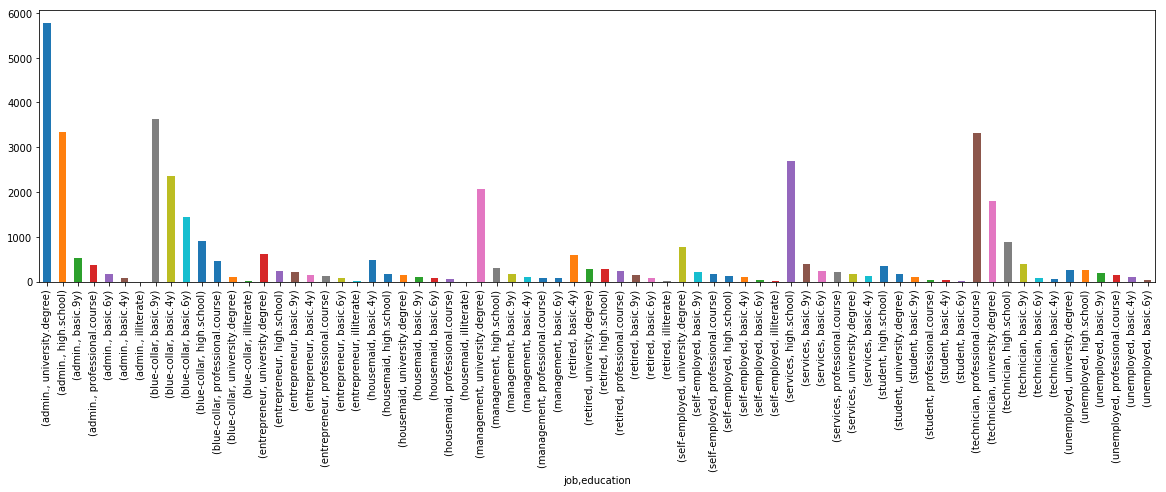

In [80]:
# Plotting to view the totals of the grouping education and job, in order to
# see what is the most educational attainment people of a particular job have
sales[ 'education' ].groupby( sales[ 'job' ] ).value_counts().plot.bar( figsize = ( 20, 5 ) )


In [81]:
# Create a lookup table of education by job to fill in missing education values
edulook = sales.groupby( [ 'job' ] ).apply( pd.DataFrame.mode ) # find the mode for education by job

edulook = edulook[ 'education' ] # Store only the education variable
edulook = pd.DataFrame( edulook ) # Create it as a dataframe
edulook = edulook.reset_index() # Reset index

edulook = edulook.drop( [ 'level_1' ], axis = 1 ) # Drop surplus field
edulook = edulook.set_index( [ 'job' ] ) # Set job as index
edulook = edulook[ edulook[ 'education' ].notnull() ] # Use only non-null values


In [82]:
# Fill null education values using the education lookup
nulls = sales.loc[ sales[ 'education' ].isnull(), 'job' ]
sales.loc[ sales[ 'education' ].isnull(), 'education' ] = edulook.loc[ nulls ].values


<h3>Imputing the Loan and Housing features</h3>

In [83]:
# Forward fill missing values for 'loan' and 'housing'
sales[ 'loan' ] = sales[ 'loan' ].ffill()
sales[ 'housing' ] = sales[ 'housing' ].ffill()


In [84]:
# Checking if all nulls have been filled (except 'default' as this will be exlcuded)
sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           32591 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
age_break         41188 non-null category
dtypes: c

<a name='exploring'></a>
<h2>Exploring the Data</h2>

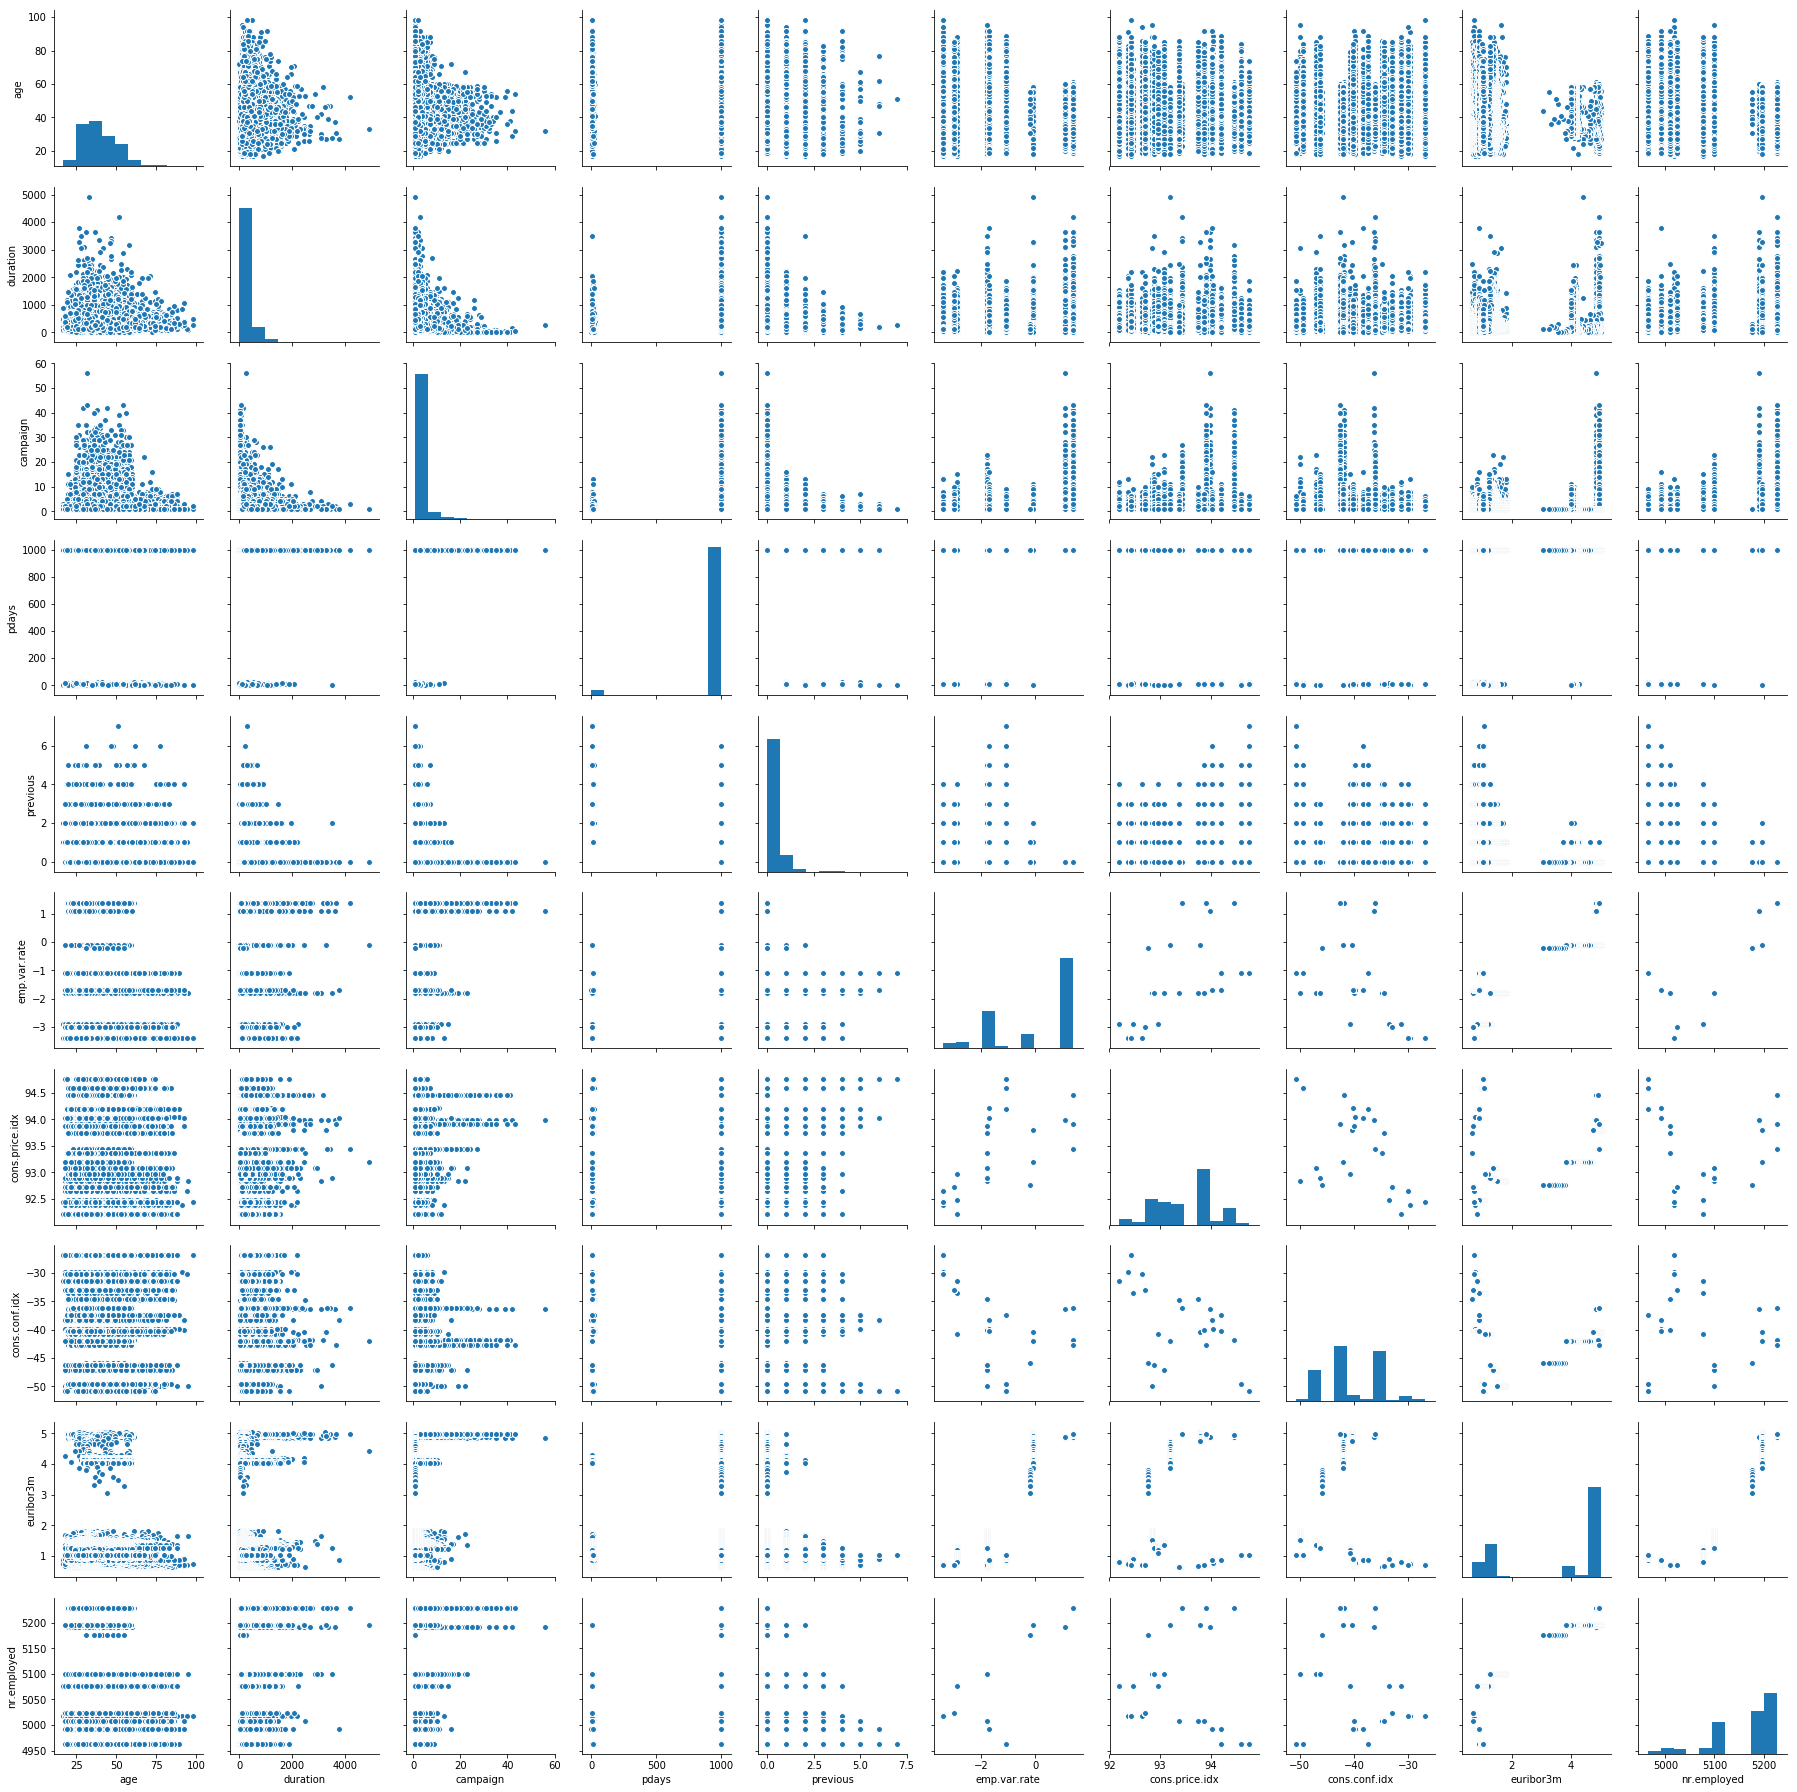

In [85]:
# Run a pair plot to see the relationship between features
sns.pairplot( sales );


<h3>Plotting the Euribor 3-Month Rates During the Campaign Period</h3>

In [86]:
# Euribor rates Time Series

# Euribor 3-month rates
#   2008: https://www.euribor-rates.eu/euribor-2008.asp?i1=6&i2=1
#   2009: https://www.euribor-rates.eu/euribor-2009.asp?i1=6&i2=1
#   2010: https://www.euribor-rates.eu/euribor-2010.asp?i1=6&i2=1

euribor_rates_3_mos = [
    4.665,
    4.367,
    4.383,
    4.731,
    4.855,
    4.865,
    4.955,
    4.968,
    4.961,
    5.291,
    4.733,
    3.816,
    
    2.859,
    2.077,
    1.811,
    1.498,
    1.354,
    1.266,
    1.085,
    0.886,
    0.819,
    0.754,
    0.722,
    0.720,
    
    0.700,
    0.665,
    0.655,
    0.635,
    0.665,
    0.702,
    0.782,
    0.898,
    0.886,
    0.942,
    1.046,
    1.026
]


# date_range - quarter
date_range = pd.date_range( start = '2008, 1, 1', periods = 36, freq = 'BMS' )

# Euribor rate Time Series
euribor_series = pd.Series( euribor_rates_3_mos, index = date_range )
euribor_series


2008-01-01    4.665
2008-02-01    4.367
2008-03-03    4.383
2008-04-01    4.731
2008-05-01    4.855
2008-06-02    4.865
2008-07-01    4.955
2008-08-01    4.968
2008-09-01    4.961
2008-10-01    5.291
2008-11-03    4.733
2008-12-01    3.816
2009-01-01    2.859
2009-02-02    2.077
2009-03-02    1.811
2009-04-01    1.498
2009-05-01    1.354
2009-06-01    1.266
2009-07-01    1.085
2009-08-03    0.886
2009-09-01    0.819
2009-10-01    0.754
2009-11-02    0.722
2009-12-01    0.720
2010-01-01    0.700
2010-02-01    0.665
2010-03-01    0.655
2010-04-01    0.635
2010-05-03    0.665
2010-06-01    0.702
2010-07-01    0.782
2010-08-02    0.898
2010-09-01    0.886
2010-10-01    0.942
2010-11-01    1.046
2010-12-01    1.026
Freq: BMS, dtype: float64

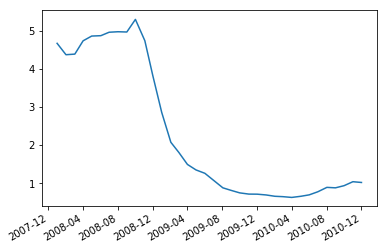

In [87]:
# Plotting Euribor time series
euribor_series.plot()


<h3>Acceptance Chart and Ratio by Education</h3>

In [88]:
# Computing for acceptance ratio by education
acceptance_df = get_acceptance_ratio( sales, 'education', 'y', 'yes', 'no' )
acceptance_df


y,no,yes,acceptance_rate_total,acceptance_rate_group
education,,,,
basic.4y,3859,474,1.150821,10.939303
basic.6y,2104,188,0.456444,8.202443
basic.9y,6093,504,1.223657,7.639836
high.school,8723,1109,2.692532,11.279496
illiterate,14,4,0.009712,22.222222
professional.course,4835,620,1.505293,11.365720
university.degree,10920,1741,4.226959,13.750889


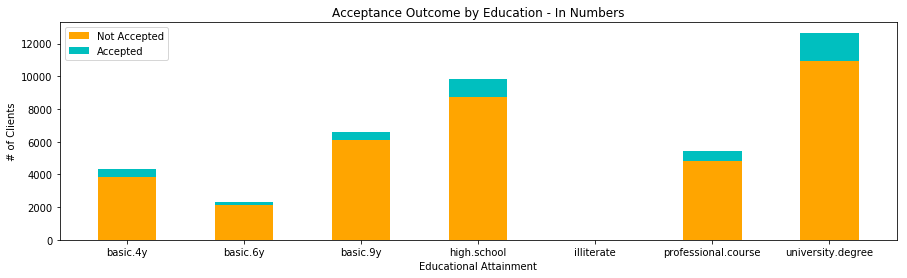

In [89]:
# Plotting acceptance by education
frame_data = {
    'dataframe': sales,
    'column': 'education',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 15, 4 ),
    'title': 'Acceptance Outcome by Education - In Numbers',
    'label_x': 'Educational Attainment',
    'label_y': '# of Clients'
}

create_acceptance_chart( frame_data, chart_data )


<h3>Acceptance Chart and Ratio by Job</h3>

In [90]:
# Computing for acceptance ratio by job
acceptance_df = get_acceptance_ratio( sales, 'job', 'y', 'yes', 'no' )
acceptance_df


y,no,yes,acceptance_rate_total,acceptance_rate_group
job,,,,
admin.,9155,1367,3.318928,12.991827
blue-collar,8803,652,1.582985,6.895822
entrepreneur,1332,124,0.301059,8.516484
housemaid,954,106,0.257357,10.000000
management,2596,328,0.796348,11.217510
retired,1307,442,1.073128,25.271584
self-employed,1272,149,0.361756,10.485574
services,3646,323,0.784209,8.138070
student,600,275,0.667670,31.428571


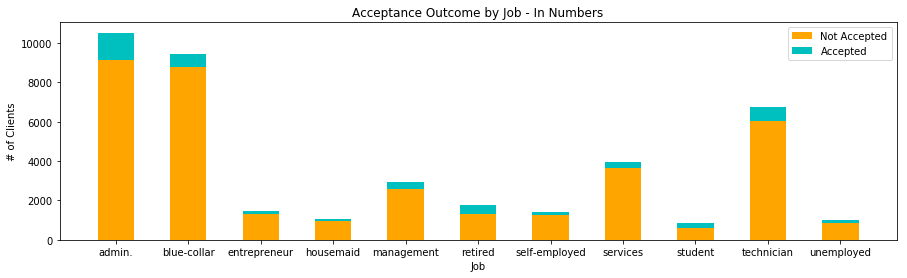

In [91]:
# Plotting acceptance by job
frame_data = {
    'dataframe': sales,
    'column': 'job',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 15, 4 ),
    'title': 'Acceptance Outcome by Job - In Numbers',
    'label_x': 'Job',
    'label_y': '# of Clients'
}

create_acceptance_chart( frame_data, chart_data )


<h3>Acceptance Chart and Ratio by Age Group</h3>

In [92]:
# Computing for acceptance ratio by age group
acceptance_df = get_acceptance_ratio( sales, 'age_break', 'y', 'yes', 'no' )
acceptance_df


y,no,yes,acceptance_rate_total,acceptance_rate_group
age_break,,,,
"(0, 20]",83,57,0.138390,40.714286
"(20, 40]",20964,2664,6.467903,11.274759
"(40, 59]",14780,1447,3.513159,8.917237
"(59, 200]",721,472,1.145965,39.564124


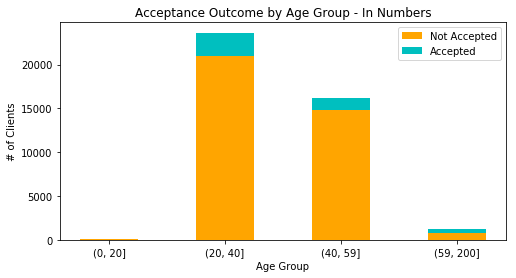

In [ ]:
# Plotting acceptance by age group
frame_data = {
    'dataframe': sales,
    'column': 'age_break',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 8, 4 ),
    'title': 'Acceptance Outcome by Age Group - In Numbers',
    'label_x': 'Age Group',
    'label_y': '# of Clients'
}

create_acceptance_chart( frame_data, chart_data )


From the above, campaigns targeted primarily individuals between 20 and 40 years old,  and secondarily individuals between 40 and 59 years old. And there was no significant difference in the acceptance rate between these two age groups. 

<h3>Acceptance Chart and Ratio by Day of the Week</h3>

In [ ]:
# Computing for acceptance ratio by day of the week
acceptance_df = get_acceptance_ratio( sales, 'day_of_week', 'y', 'yes', 'no' )
acceptance_df


In [ ]:
# Plotting acceptance by day of week
frame_data = {
    'dataframe': sales,
    'column': 'day_of_week',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 7, 3 ),
    'title': 'Acceptance Outcome by Day of the Week - In Numbers',
    'label_x': 'Weekday',
    'label_y': '# of Clients'  
}

create_acceptance_chart( frame_data, chart_data )


From the above, campaigns targeted ran equally for all the days of the week (as intuitively expected), and there was no significant differences in the acceptance relate between the different weekdays. 

<h3>Acceptance Chart and Ratio by Existing Personal Loan</h3>

In [ ]:
# Computing for acceptance ratio by existing personal loan
acceptance_df = get_acceptance_ratio( sales, 'loan', 'y', 'yes', 'no' )
acceptance_df


In [ ]:
# Plotting acceptance by existing personal loan
frame_data = {
    'dataframe': sales,
    'column': 'loan',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 3, 3 ),
    'title': 'Acceptance Outcome by Existing Personal Loan - In Numbers',
    'label_x': 'Loan',
    'label_y': '# of Clients'  
}

create_acceptance_chart( frame_data, chart_data )


From the above, campaigns targeted mostly individuals with no personal loan.  However the acceptance was low, regardless whether the target had personal loan. 

<h3>Acceptance Chart and Ratio by Existing Mortgage</h3>

In [ ]:
# Computing for acceptance ratio by existing mortgage
acceptance_df = get_acceptance_ratio( sales, 'housing', 'y', 'yes', 'no' )
acceptance_df


In [ ]:
# Plotting acceptance by existing mortgage
frame_data = {
    'dataframe': sales,
    'column': 'housing',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 5, 4 ),
    'title': 'Acceptance Outcome by Existing Mortgage - In Numbers',
    'label_x': 'Mortgage',
    'label_y': '# of Clients'  
}

create_acceptance_chart( frame_data, chart_data )


The target audience for the campaigns were slightly higher for individuals with mortgage, however the acceptance rate was the same for both groups. 

<h3>Acceptance Chart and Ratio by Outcome of Previous Campaign</h3>

In [ ]:
# Computing for acceptance ratio by outcome of previous campaign
acceptance_df = get_acceptance_ratio( sales, 'poutcome', 'y', 'yes', 'no' )
acceptance_df


In [ ]:
# Plotting acceptance by outcome of previous campaign
frame_data = {
    'dataframe': sales,
    'column': 'poutcome',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 5, 5 ),
    'title': 'Acceptance Outcome by Outcome of Previous Campaign - In Numbers',
    'label_x': 'Outcome of Previous Campaign',
    'label_y': '# of Clients'  
}

create_acceptance_chart( frame_data, chart_data )


Clients tend to accept offer when there were not targeted in previous campaigns. Also clients who have previously been targeted and accepted, tend to accept new offer. 

<h3>Acceptance Chart and Ratio by Number of Days after Last Contact in Previous Campaign</h3>

In [ ]:
# In order to plot pdays vs the outcome, we need to adjust the data, since the value 999 is oddly larger
# than all the other values, creating issues in the plotting. Since the value of 999 in pdays means that
# client was not previously contacted, the maximum value in the dataset is 27, and we are grouping values
# above 30 together for the bar plot, by assigning pdays = 999 as 31, we will be able to include it in
# the plotting, but do not disfigure the plot because of this oddly large value (dummy value)
sales[ 'pdays' ].replace( 999, 31, inplace = True )


In [ ]:
# Adding a pdays break variable to the dataframe
sales[ 'pdays_break' ] = pd.cut( sales[ 'pdays' ], [ 0, 10, 20, 30, 40 ] )


In [ ]:
# Computing for acceptance ratio by number of days after last contact from previous campaign
acceptance_df = get_acceptance_ratio( sales, 'pdays_break', 'y', 'yes', 'no' )
acceptance_df


In [ ]:
# Plot acceptance by number of days after last contact previous campaign
frame_data = {
    'dataframe': sales,
    'column': 'pdays_break',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 20, 8 ),
    'title': 'Acceptance Outcome by Number of Days After Last Contact Prev. Campaign - In Numbers',
    'label_x': '# of Days After Last Contact Prev. Campaign',
    'label_y': '# of Clients'  
}

create_acceptance_chart( frame_data, chart_data )


Campaign largely targeted clients who have not previously been contacted by other campaigns

In [ ]:
# Removing column pdays_break, since we will not need it anymore, and we do not
# want having this column interfere in the modelling portion of the analysis
sales = sales.drop( [ 'pdays_break' ], axis = 1 )


<h3>Acceptance Chart and Ratio by Number of Correspondence in Current Campaign</h3>

In [ ]:
np.unique( sales.campaign )


In [ ]:
# Adding a campaign_break variable to the dataframe
sales[ 'campaign_break' ] = pd.cut( sales[ 'campaign' ], [ 0, 10, 20, 30, 40, 50, 60 ] )


In [ ]:
# Computing for acceptance ratio by number of days after last correspondence from previous campaign
acceptance_df = get_acceptance_ratio( sales, 'campaign_break', 'y', 'yes', 'no' )
acceptance_df


In [ ]:
# Plot acceptance by number of contacts in this campaign
frame_data = {
    'dataframe': sales,
    'column': 'campaign_break',
    'target': 'y',
    'accept': 'yes',
    'reject': 'no'
}

chart_data = {
    'tick_values': acceptance_df.index,
    'dimension': ( 10, 5 ),
    'title': 'Acceptance Outcome by Number of Correspondences in this Campaign - In Numbers',
    'label_x': 'Correspondences this Campaign',
    'label_y': '# of Clients'  
}

create_acceptance_chart( frame_data, chart_data )


In [ ]:
# Removing the column campaign_break, since we will not need it anymore, and we do
# not want having this column interfere in the modelling portion of the analysis
sales = sales.drop( [ 'campaign_break' ], axis = 1 )


In [ ]:
# Perform categorical encoding via One Hot Encoding method
sales_encoded = do_categorical_encoding( sales, 'object', 'y' )


In [ ]:
# Dropping all categorical and unused columns or features
drop_columns( sales_encoded, 'object', [ 'age_break', 'duration' ] )


<a name='selecting'></a>
<h2>Selecting and Running the Model</h2>

In [ ]:
# Running a correlation matrix to confirm
corr = sales.corr()
corr.style.background_gradient()


In [ ]:
# Splitting the data
y = sales[ 'y' ]
X_train, X_test, y_train, y_test = train_test_split( sales_encoded, y, test_size = 0.33, random_state = 42 )


In [ ]:
# Looking at the shape of the train and test data
print( X_train.shape, y_train.shape )
print( X_test.shape, y_test.shape )


In [ ]:
# Fitting the random forest 
rf = RandomForestClassifier( max_features = 'sqrt' )
rf.fit( X_train, y_train )


In [ ]:
# Showing the most important x variables/features in the model
feature_importances = pd.DataFrame(
    rf.feature_importances_,
    index = X_train.columns,
    columns = [ 'y' ] 
).sort_values( 'y', ascending = False )

print( feature_importances )


<a name='evaluating'></a>
<h2>Model Evaluation</h2>

In [ ]:
# Determining the accuracy of the random forest on the train data
rf.score( X_train, y_train )


In [ ]:
# Running confusion matrix on train data to show false successes and false failures
pd.DataFrame (
    confusion_matrix( y_train, rf.predict( X_train ) ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ] 
)


In [ ]:
# Determining th accuracy of applying the random forest model on the test data
predictions = rf.predict( X_test )
rf.score( X_test, y_test )


In [ ]:
# Running confusion matrix on test data to show false successes and false failures
pd.DataFrame (
    confusion_matrix( y_test, rf.predict( X_test ) ),
    columns = [ 'Predicted Success', 'Predicted Failure' ],
    index = [ 'True Success', 'True Failure' ]
)
